In [ ]:
# Imports
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

In [ ]:
# Data gathering/preparation
mnist = tf.keras.datasets.mnist  # 28 x 28 image

In [ ]:
# Load up data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
printable_train_images = train_images
printable_test_images = test_images

In [ ]:
# Print data of single hand written char
print(train_images.shape)

(60000, 28, 28)


In [ ]:
print(train_images[50]) # Knida looks like a 3

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  12  56 140 126 175 200  96   2
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  35 166 238 254 246 242 253 246 254  67
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 184 182 146 127  70  30  45  36 215 175
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30   0   0   0   0   0   0   0 207 246
   14   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  5

In [ ]:
# Reshape
train_images = train_images.reshape((60000,28,28,1)) # change format so each image is flattened into array

In [ ]:
print(train_images.shape)

(60000, 28, 28, 1)


In [ ]:
print(train_images[50])

[[[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [ 12]
  [ 56]


In [ ]:
# Normalize data between 0 and 1
train_images = train_images.astype('float32') / 255.0

In [ ]:
# Print normalized data
print (train_images[50]) # Another sanity check

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [ ]:
test_image = test_images.reshape(10000,28,28,1)
test_images = test_images.astype('float32') / 255.0

In [ ]:
# One-hot encode the target variables (this step is not in the video)
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
# Create model
model = tf.keras.models.Sequential()

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential()

# First convolutional layer
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Second convolutional layer
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Third convolutional layer
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Flattening the output
model.add(tf.keras.layers.Flatten())

# Fully connected layers
model.add(tf.keras.layers.Dense(256, activation='relu'))  # Increased size for more capacity
model.add(tf.keras.layers.Dropout(0.5))  # Dropout for regularization
model.add(tf.keras.layers.Dense(10, activation='softmax'))  # Output layer

# Compile the model with Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# View model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 257,674 (1006.54 KB)

 Trainable params: 257,674 (1006.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train model
model.fit(train_images, train_labels, epochs=8, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8130 - loss: 0.5628 - val_accuracy: 0.9809 - val_loss: 0.0664
Epoch 2/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9764 - loss: 0.0786 - val_accuracy: 0.9860 - val_loss: 0.0484
Epoch 3/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9838 - loss: 0.0536 - val_accuracy: 0.9862 - val_loss: 0.0490
Epoch 4/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9873 - loss: 0.0409 - val_accuracy: 0.9877 - val_loss: 0.0454
Epoch 5/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9904 - loss: 0.0312 - val_accuracy: 0.9888 - val_loss: 0.0446
Epoch 6/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9914 - loss: 0.0284 - val_accuracy: 0.9877 - val_loss: 0.0439
Epoch 7/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9936 - loss: 0.0199 - val_accuracy: 0.9888 - val_loss: 0.0456
Epoch 8/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9943 - loss: 0.0186 - val_accuracy: 0.9893 -

In [ ]:
# Evaluate val loss and accuracy
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9868 - loss: 0.0630


[0.04716895893216133, 0.989300012588501]

In [ ]:
# Save the model after training
model.save('cnn.keras')

In [ ]:
# Load the model (when needed)
modelReadIn = tf.keras.models.load_model('cnn.keras')

In [ ]:
# Make predictions
predictions = modelReadIn.predict([test_images])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# Print raw one-hot outputs
print(predictions)

[[2.3631149e-13 2.9661271e-08 3.2892300e-10 ... 1.0000000e+00
  4.8030749e-14 1.6225607e-10]
 [5.3166129e-09 1.9320685e-09 9.9999976e-01 ... 1.8707777e-07
  1.1549958e-10 3.5734343e-11]
 [2.2257958e-09 9.9999785e-01 3.3391464e-07 ... 1.3659865e-06
  2.2844084e-07 8.4213383e-09]
 ...
 [2.7792340e-14 5.7992307e-14 1.3601862e-14 ... 1.2716381e-13
  1.2520917e-11 4.2275627e-11]
 [6.2508954e-09 1.0217719e-10 2.0285178e-12 ... 1.3627250e-11
  1.6320266e-05 8.6384523e-07]
 [3.5142833e-08 3.1861586e-10 1.6144271e-09 ... 7.8872239e-12
  1.1848433e-08 5.1519744e-10]]


In [ ]:
# argmax() is for winner takes all
print(np.argmax(predictions[111])) # this will print the prediction our model is making

7


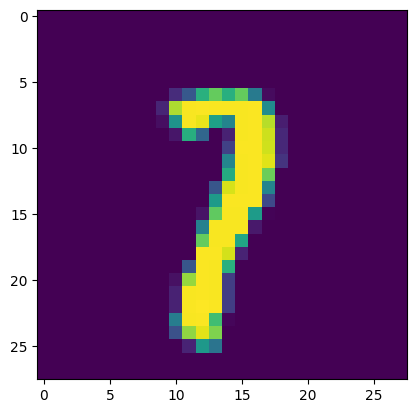

In [ ]:
# Display the test data
plt.imshow(printable_test_images[111]) # this will print the actual data and we can compare it with our models guess

In [ ]:
all_layers = model.layers

filters, biases = all_layers[0].get_weights()

In [ ]:
print(filters.shape)
print(filters)

(3, 3, 1, 64)
[[[[-1.30603593e-02  8.00024644e-02  1.70576751e-01  1.44509703e-01
    -3.10054868e-02 -1.55222174e-02  9.72619429e-02  9.83153656e-03
    -2.43361935e-01 -1.86393373e-02 -2.30934367e-01  5.06809205e-02
     7.30314031e-02  1.51896387e-01 -1.85995072e-01  4.96466197e-02
    -8.27127695e-02  8.01155046e-02 -1.28318906e-01 -1.82214290e-01
     3.16604488e-02 -4.07141931e-02 -6.75807968e-02  6.76926225e-02
    -3.00027076e-02 -2.11513788e-02 -1.15531301e-02  2.20184438e-02
     1.05562359e-01  1.22600168e-01  1.64119992e-02  1.19805522e-01
    -2.12193385e-01  2.83147562e-02 -3.93118598e-02 -1.61692739e-01
     7.33804107e-02 -7.08554238e-02  7.65893012e-02  6.64699152e-02
    -3.30935568e-02 -1.42880470e-01 -1.13593072e-01 -2.03324214e-01
     2.36826687e-04  1.98584534e-02 -9.69846994e-02 -2.41031736e-01
     2.53626052e-02 -9.45327729e-02  1.00629320e-02 -7.27859661e-02
    -1.69824049e-01 -1.61863789e-01 -1.39359623e-01 -3.36256251e-02
    -4.55695018e-02  8.65378976e-0

In [ ]:
figure1 = plt.figure(figsize=(8,12))

<Figure size 800x1200 with 0 Axes>

In [ ]:
columns = 6
rows = 6


In [ ]:
n_filters = 32

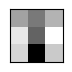

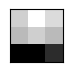

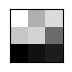

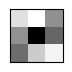

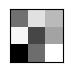

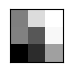

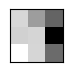

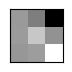

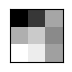

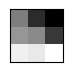

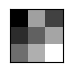

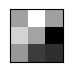

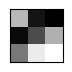

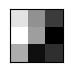

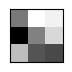

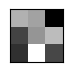

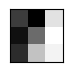

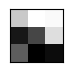

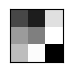

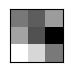

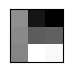

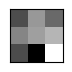

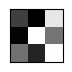

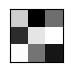

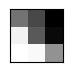

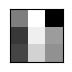

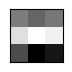

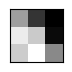

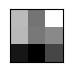

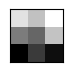

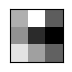

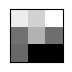

In [ ]:
for i in range (1, n_filters + 1):
  f = filters[:,:,:, i-1]
  figure1 = plt.subplot(rows,columns,i)
  figure1.set_xticks([])
  figure1.set_yticks([])
  plt.imshow(f[:,:,0], cmap='gray')
  plt.show()




In [ ]:
conv_layers_indices = [0,2,4]
outputs = [model.layers[i].output for i in conv_layers_indices]

In [ ]:
model_shortened = tf.keras.models.Model(inputs=model.inputs, outputs=outputs)
model_shortened.summary()

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 28, 28, 1)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 26, 26, 64)     │            640 │ input_layer[0][0],     │
│                           │                        │                │ input_layer[0][0],     │
│                           │                        │                │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 13, 13, 64)     │              0 │ conv2d[2][0],          │
│ (MaxPooling2D)            │                        │                │ conv2d[4][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 11, 11, 128)    │         73,856 │ max_pooling2d[1][0],   │
│                           │                        │                │ max_pooling2d[3][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 5, 5, 128)      │              0 │ conv2d_1[2][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 3, 3, 128)      │        147,584 │ max_pooling2d_1[1][0]  │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 222,080 (867.50 KB)

 Trainable params: 222,080 (867.50 KB)

 Non-trainable params: 0 (0.00 B)

(28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


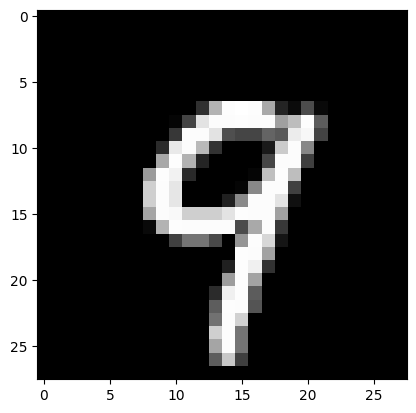

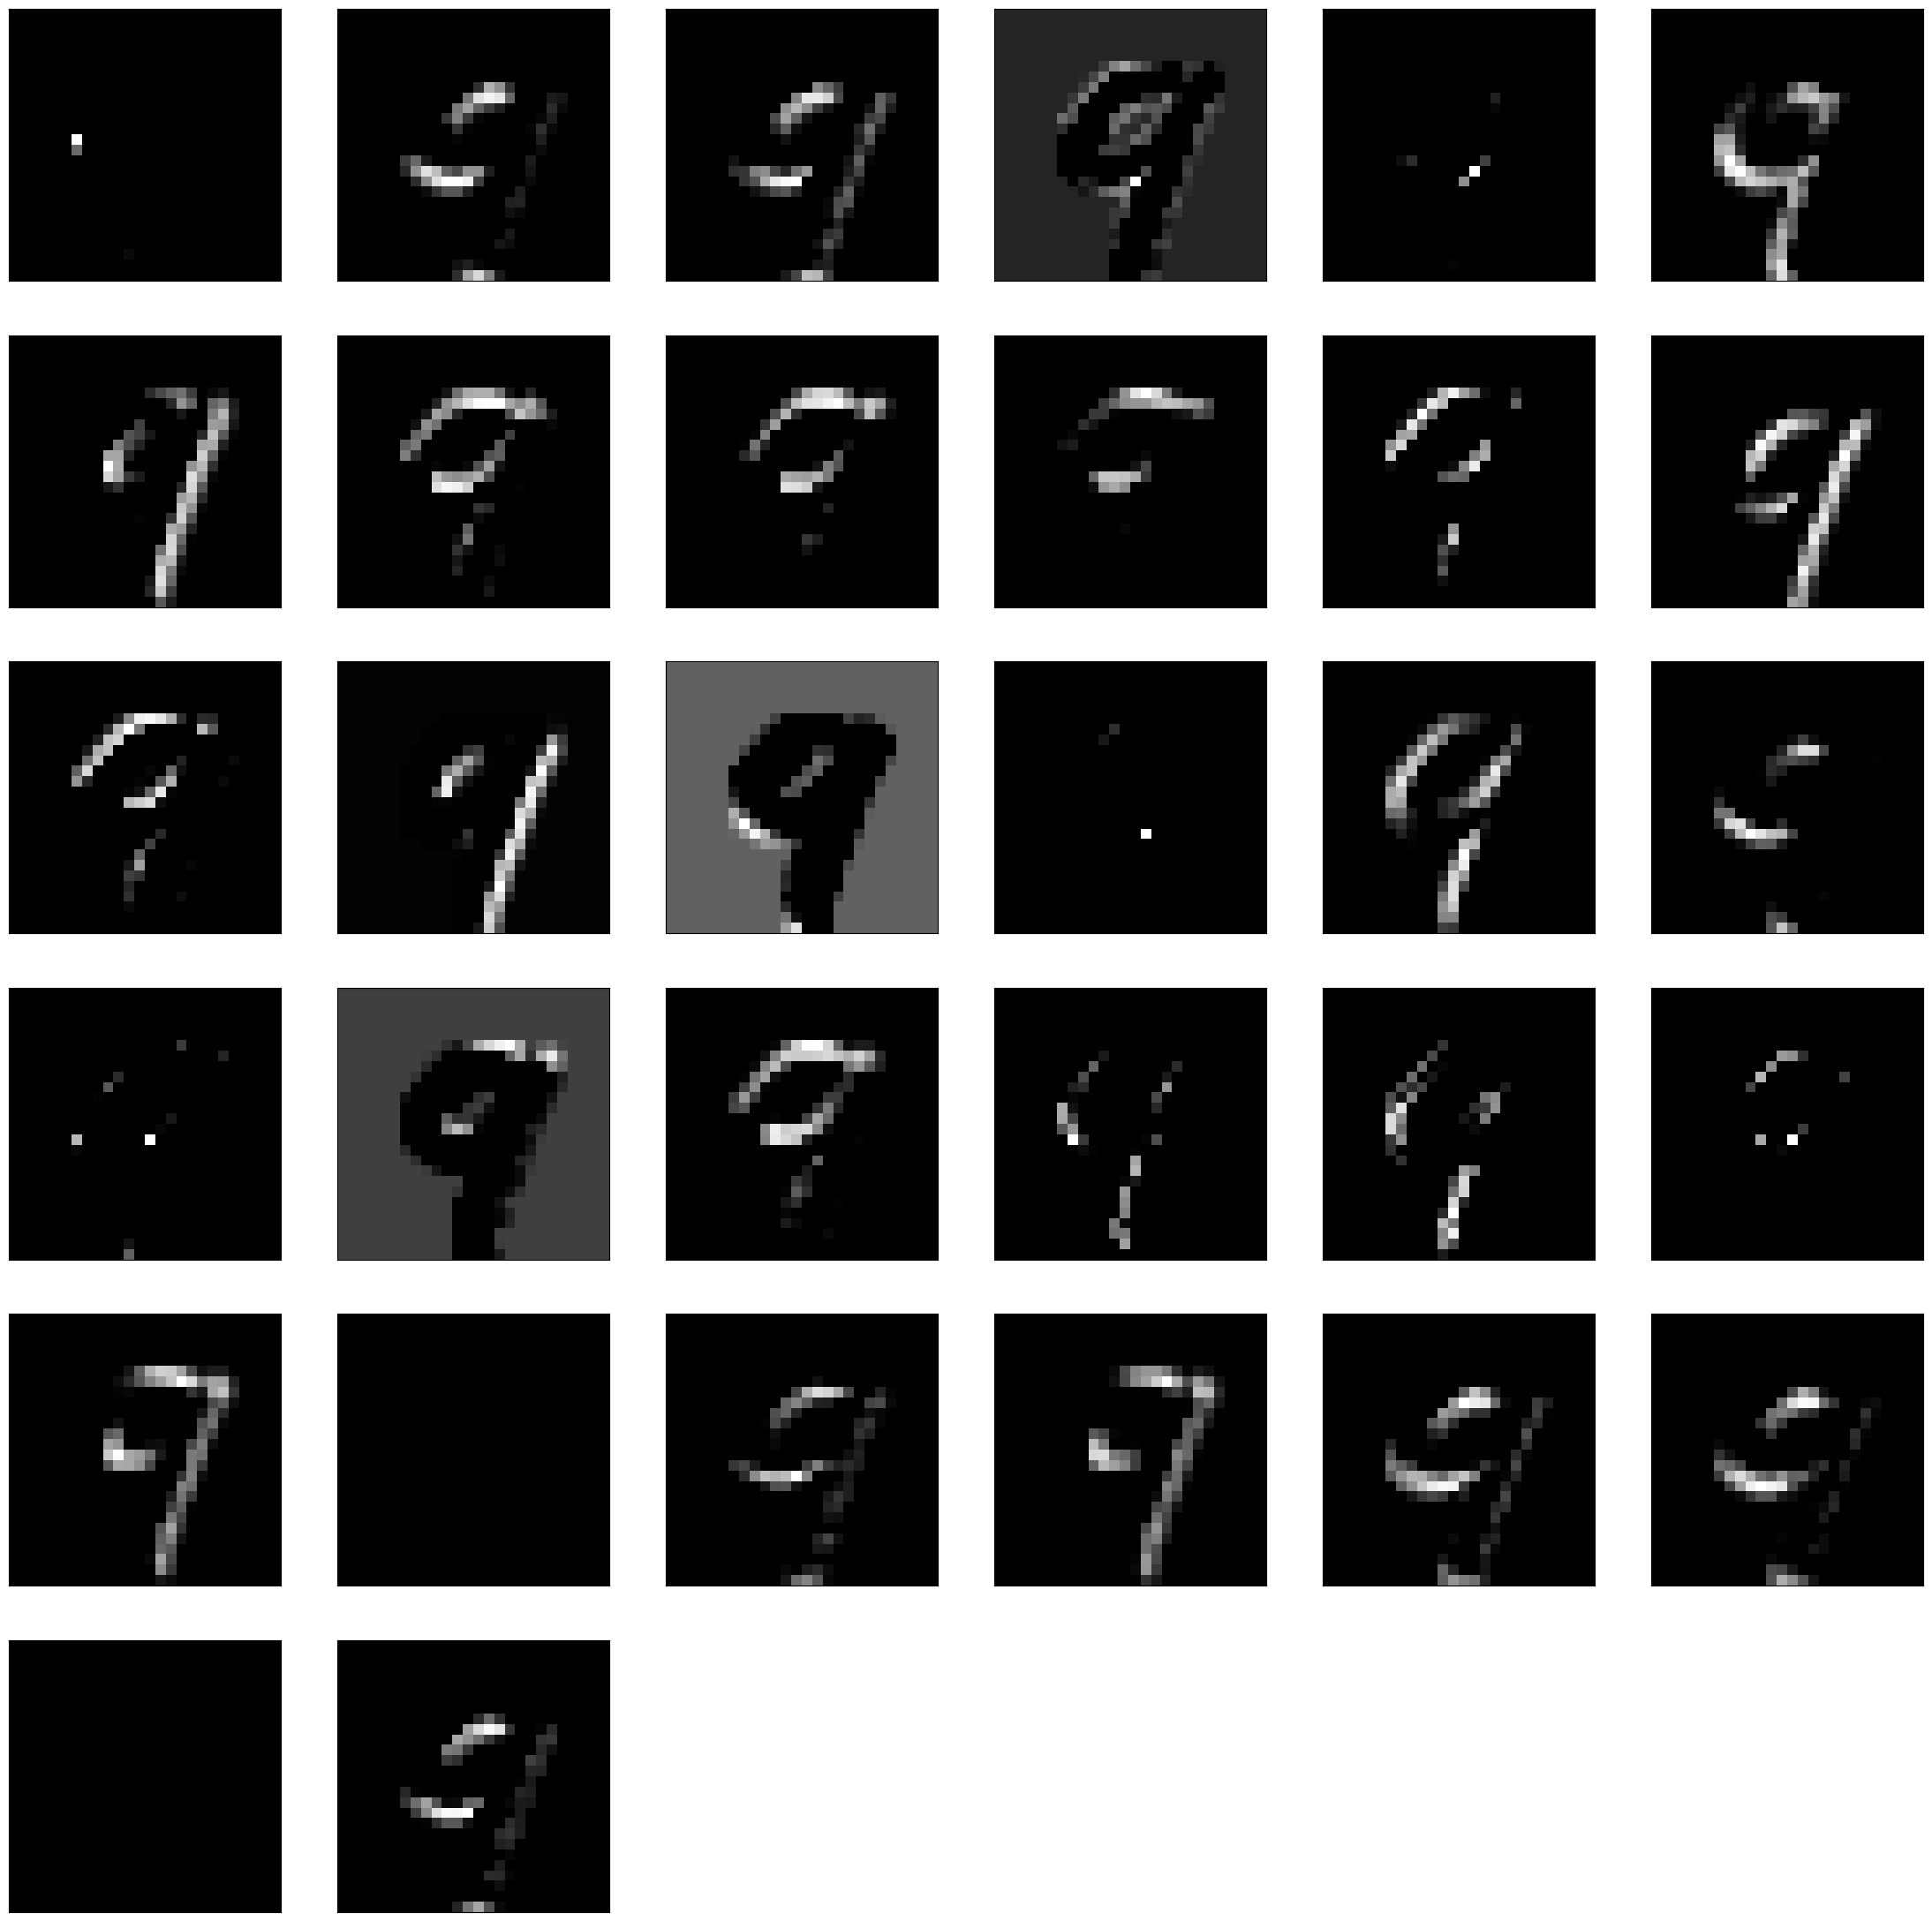

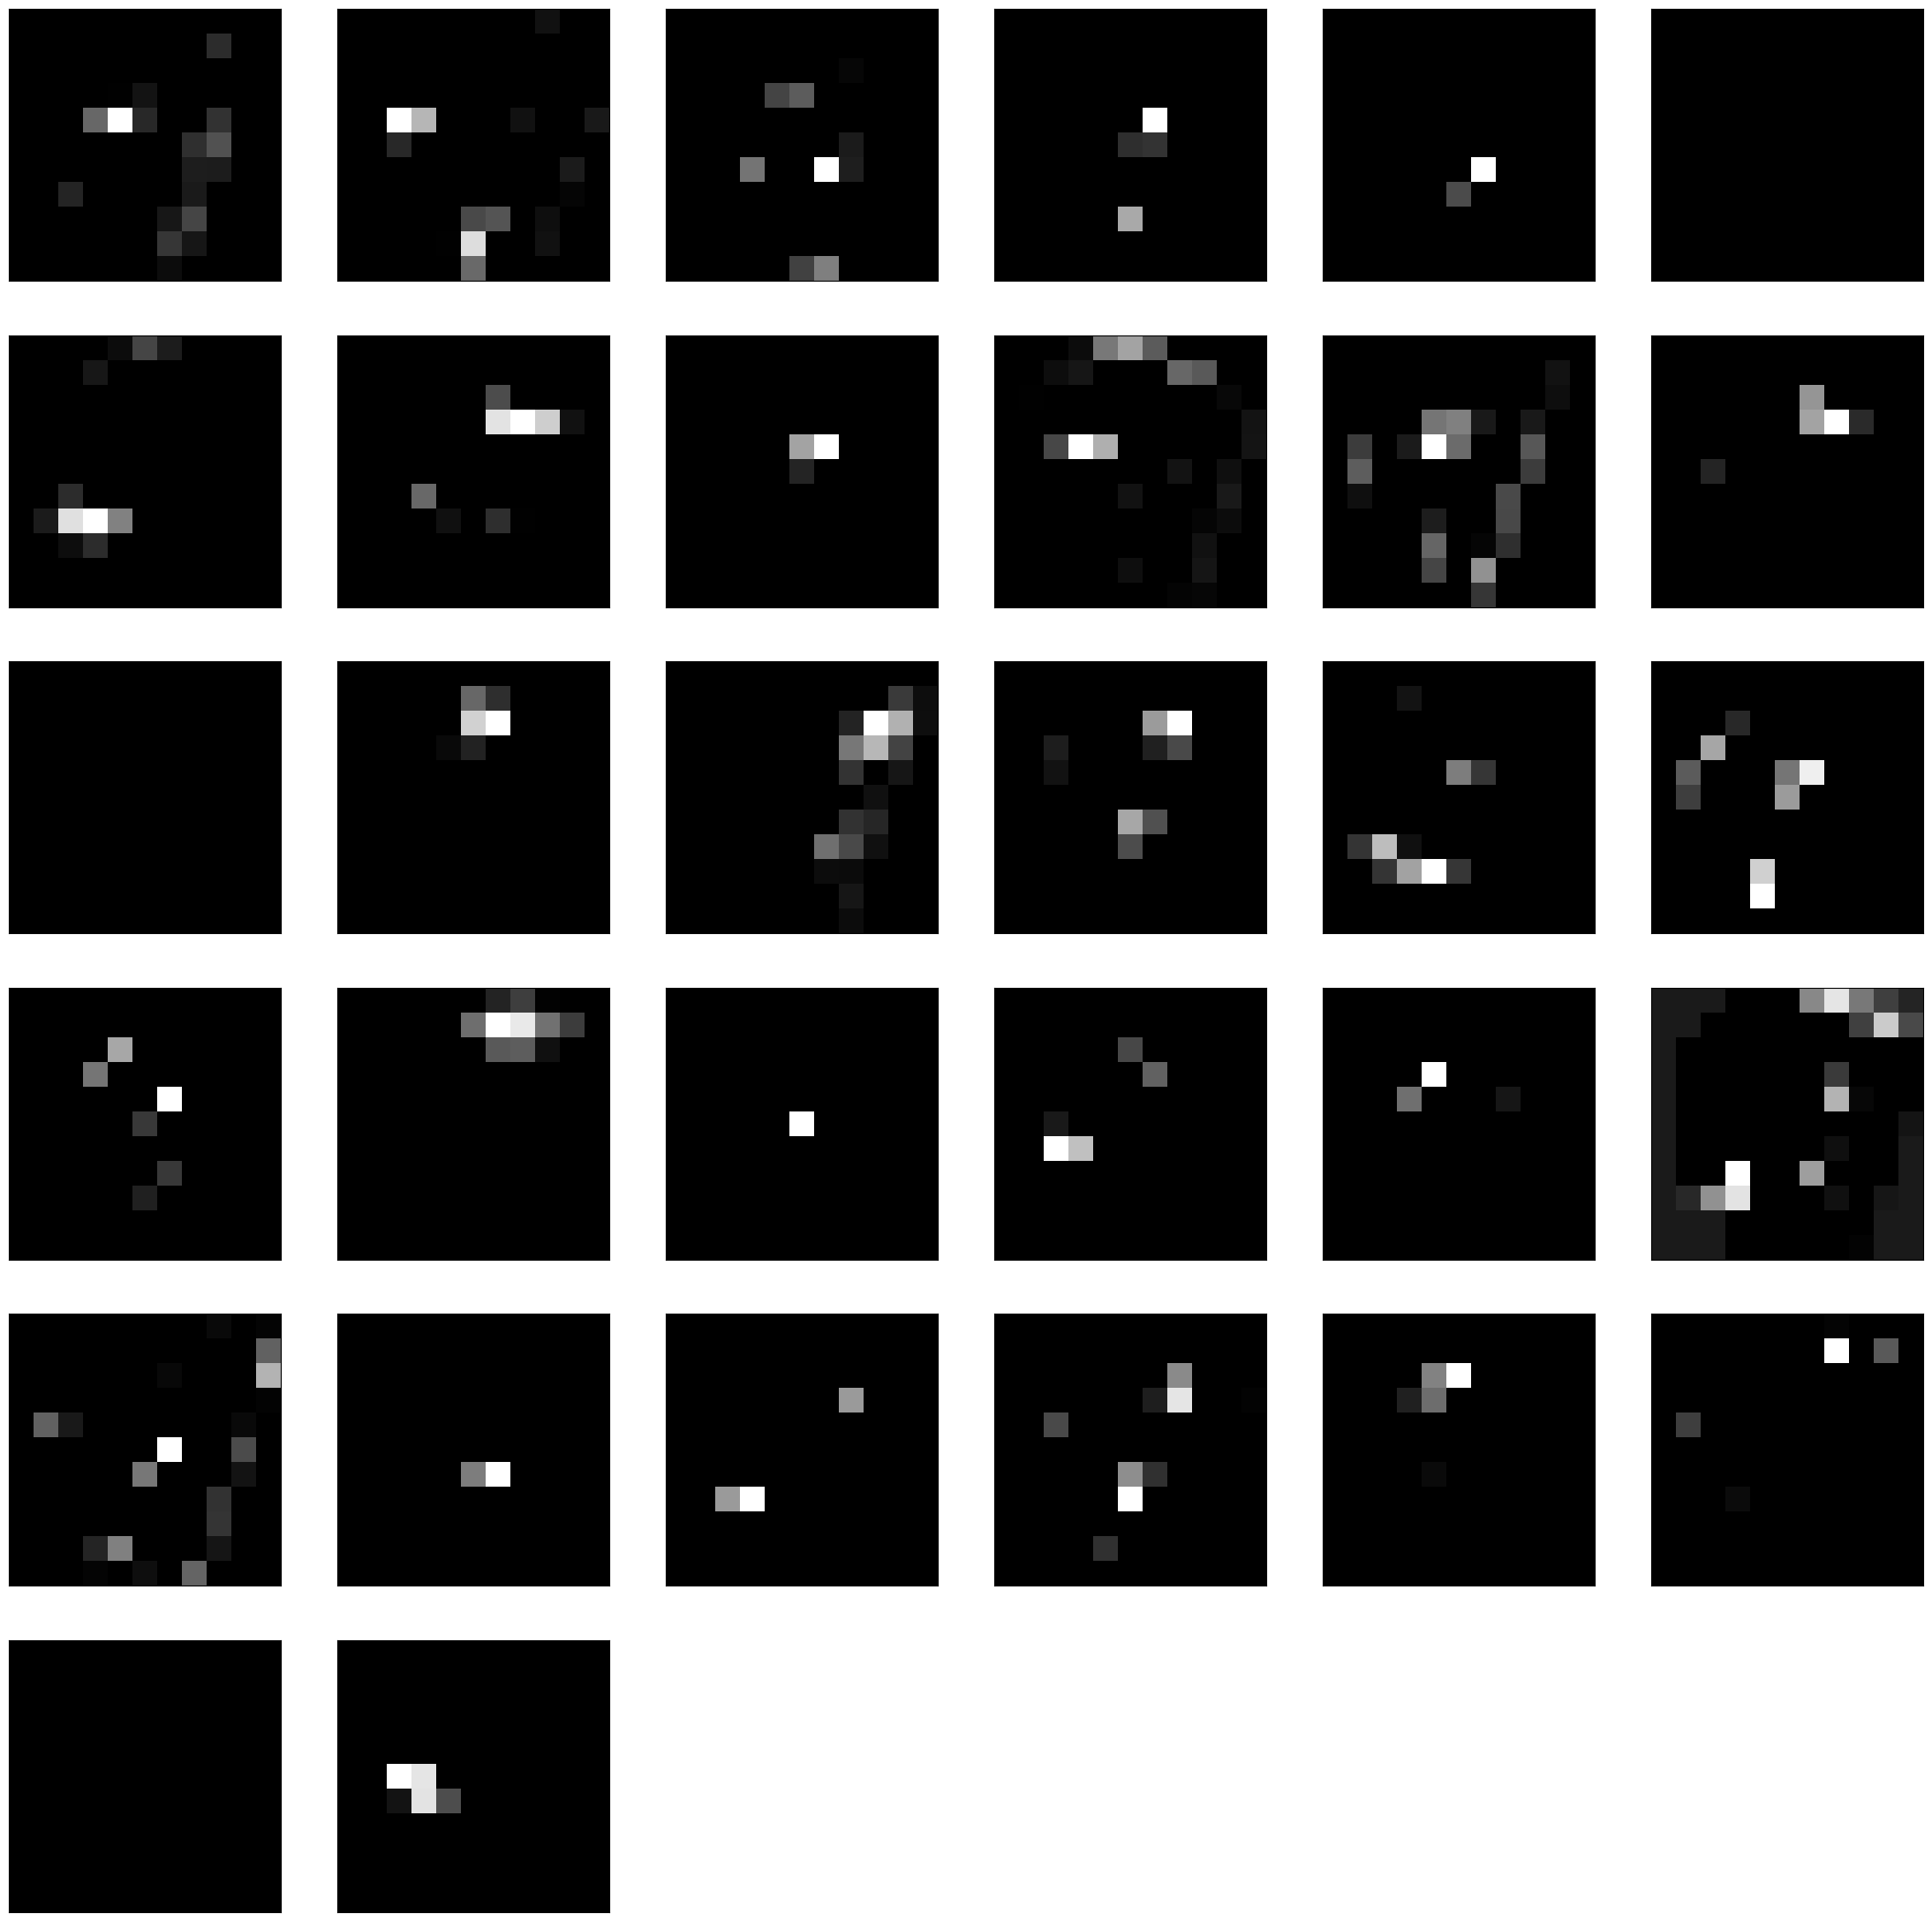

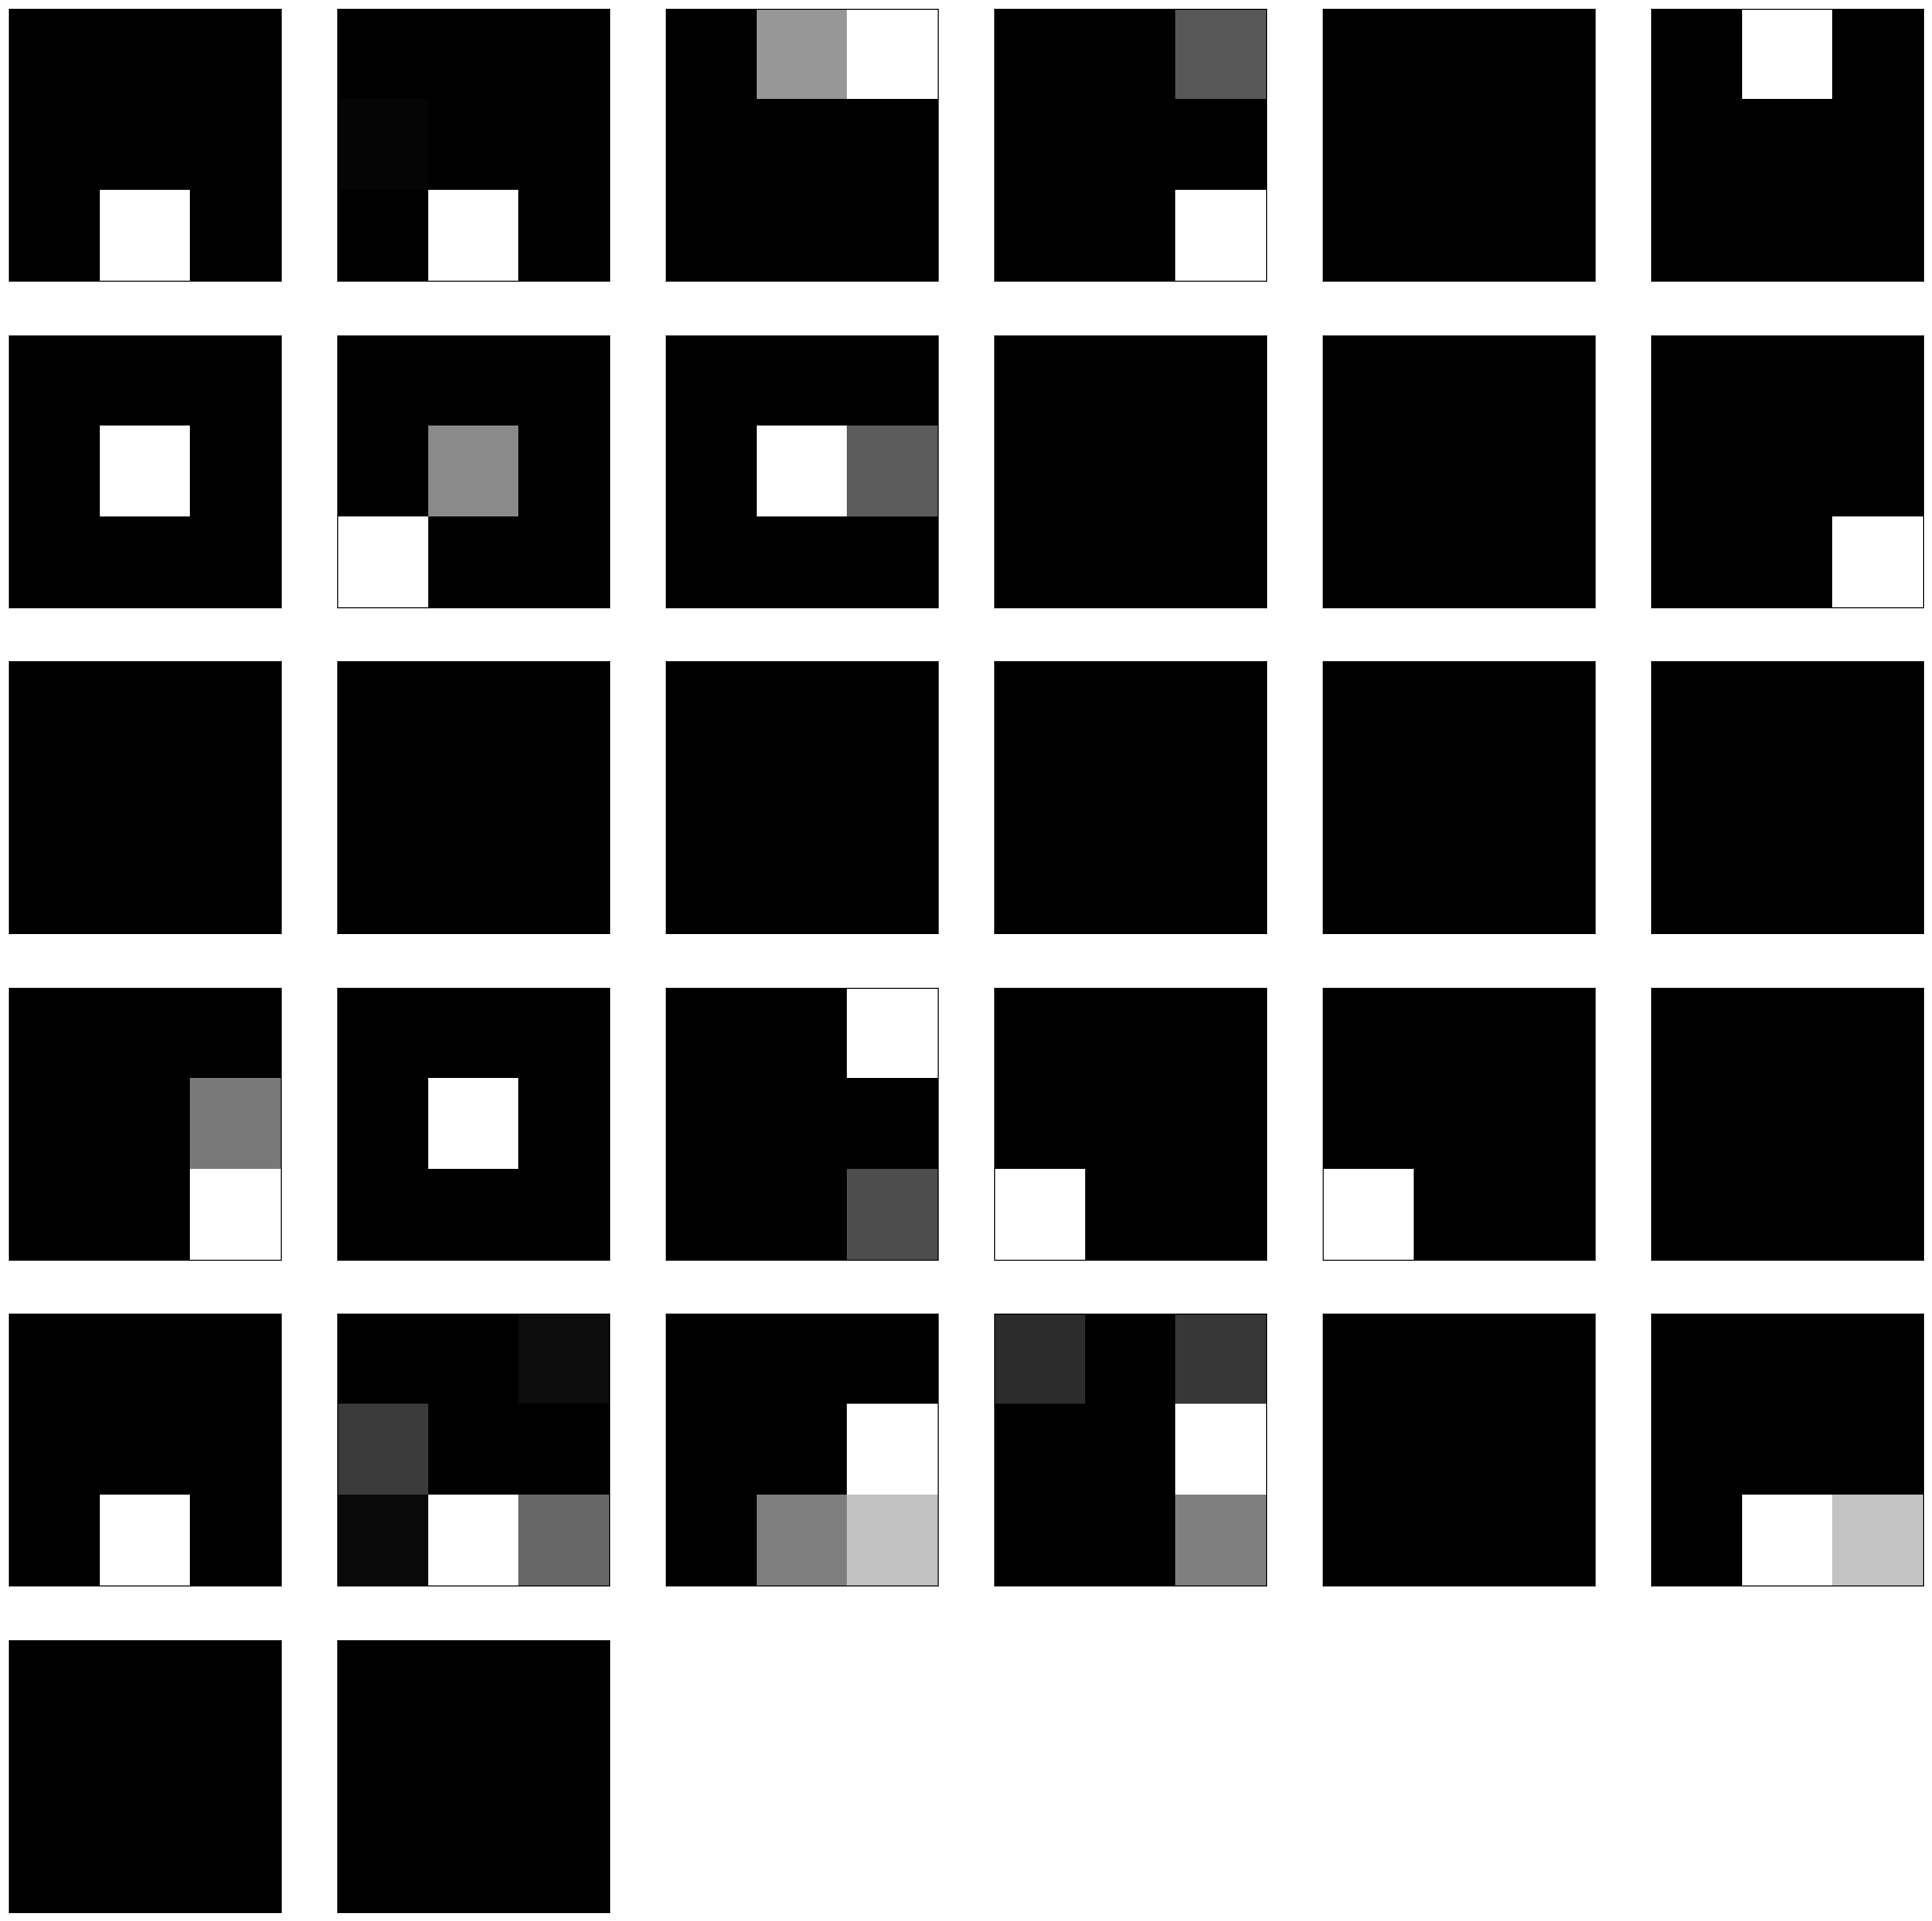

In [ ]:
columns = 6
rows = 6
testImageIndexToTry = 12
testImage = test_images[testImageIndexToTry]
print(testImage.shape)
testImage = np.expand_dims(testImage, axis=0)

plt.imshow(printable_test_images[testImageIndexToTry], cmap = 'gray')

feature_output = model_shortened.predict(testImage)
for the_filter in feature_output:
  figure2 = plt.figure(figsize=(28,28))
  for i in range(1,32 + 1):
    figure2 = plt.subplot(rows,columns, i)
    figure2.set_xticks([])
    figure2.set_yticks([])

    plt.imshow(the_filter[0,:,:,i-1], cmap='gray')
  plt.show()




Saving sample6,2.png to sample6,2.png


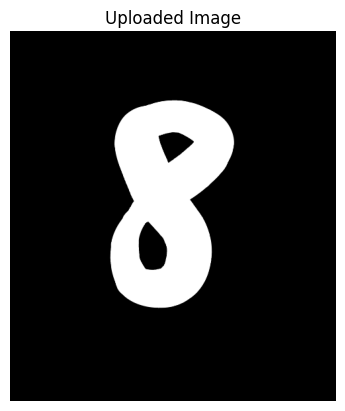

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Label: 8 (Character: 8)


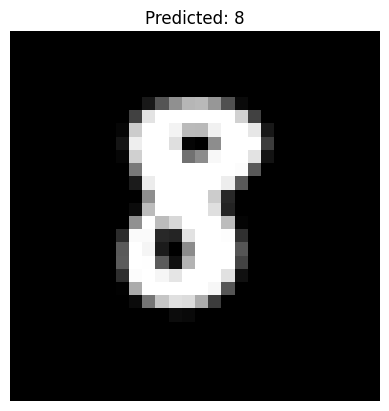

In [ ]:
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Upload an image
uploaded = files.upload()

# Load and preprocess the image
for filename in uploaded.keys():
    image_path = filename

image = Image.open(image_path)

# Display the uploaded image
plt.imshow(image, cmap='gray')
plt.title('Uploaded Image')
plt.axis('off')
plt.show()

# Preprocess the image to fit the MNIST model
image = image.convert('L')  # Convert to grayscale
image = image.resize((28, 28))  # Resize to 28x28 pixels
image_array = np.array(image)
image_array = image_array / 255.0  # Normalize pixel values
image_array = image_array.reshape(1, 28, 28, 1)  # Reshape for the model

# Make predictions using the loaded model
predicted_label = modelReadIn.predict(image_array)
predicted_index = np.argmax(predicted_label)

# Define a mapping for labels to characters (if needed)
label_to_char = {i: str(i) for i in range(10)}  # Mapping 0-9 for MNIST
predicted_char = label_to_char.get(predicted_index, "?")

# Print the prediction
print(f"Predicted Label: {predicted_index} (Character: {predicted_char})")

# Display the preprocessed image and prediction
plt.imshow(image_array[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_char}")
plt.axis('off')
plt.show()
